# Converting Luminosity to Fluence

In [1]:
import numpy as np
# from argparse import ArgumentParser

import os
import io
import tarfile

from snewpy.models import *
from snewpy.FlavorTransformation import *
# from snewpy.scripts.to_snowglobes import *

In [25]:
model = Nakazato2013('../../models/Nakazato_2013/nakazato-LS220-BH-z0.004-s30.0.fits', NoTransformation)

In [41]:
MeV = 1e6 * 1.60218e-12
energy = np.linspace(0.1, 100, 501) * MeV 
luminosity = {}

for t in model.get_time():
    

for k in spectra:
    lum = []
    for t in model.get_time():
        spectra = model.get_initialspectra(t, energy)
        lum.append(np.trapz(spectra[k], energy))
    luminosity[k] = lum

# integrate along energy to get luminosity and plot it as a function of time

{<Flavor.nu_e: 2>: [8.830737742206285e+53,
  3.1938003991218274e+54,
  9.357463699642636e+54,
  2.5771581175655987e+55,
  6.930430951535449e+55,
  1.8363390865490006e+56,
  4.763221432845589e+56,
  1.1769046549136413e+57,
  2.3071630466075168e+57,
  3.244891649710404e+57,
  4.005184105600951e+57,
  4.5483280892348e+57,
  4.93583950395593e+57,
  5.2329531616373824e+57,
  5.427466577459752e+57,
  5.58027380193462e+57,
  5.698897432969037e+57,
  5.80832994717475e+57,
  5.931241405583577e+57,
  6.079082370902189e+57,
  6.2431338017045824e+57,
  6.354998505880833e+57,
  6.264238756688417e+57,
  5.8293823616146846e+57,
  5.123191257612473e+57,
  4.391615909654424e+57,
  3.79971700063284e+57,
  3.3710013697969016e+57,
  3.0701218531890906e+57,
  2.856777440921037e+57,
  2.70173898211258e+57,
  2.585796422031268e+57,
  2.496952796439972e+57,
  2.4274473076735852e+57,
  2.372385948637854e+57,
  2.3281335477532757e+57,
  2.2923210021619442e+57,
  2.262966056146965e+57,
  2.2385761243320104e+57,


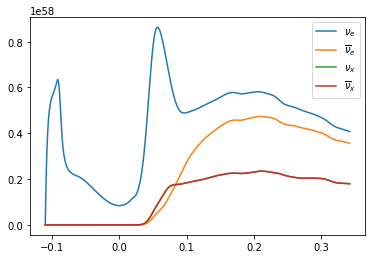

In [43]:
for k in luminosity:
    plt.plot(model.get_time(), luminosity[k], label = k.to_tex())
plt.legend()

In [28]:
# model.get_oscillatedspectra(1, E = np.linspace(1e-10, 10, 0.2))

## Converting tarfile fluence to luminosity

In [29]:
sn = SNOwGLoBES('../../models/Nakazato_2013/nakazato-LS220-BH-z0.004-s30.0.SNOformat.tar.bz2')

In [32]:
dt = sn.time[-1]-sn.time[-2]
dt
# sn.time

0.010000000000000009

In [46]:
d = 10. *1000.*3.086e+18       # luminosity to fluence
keV = 1e3 * 1.60218e-12        # eV to erg
MeV = 1e6 * 1.60218e-12
GeV = 1e9 * 1.60218e-12
dt = sn.time[-1]-sn.time[-2]
energy = np.linspace(0.1, 100, 501) * MeV 

luminosity = {}
for flavor in ['NuE', 'NuMu', 'NuTau', 'aNuE', 'aNuMu', 'aNuTau']:
    lum = []
    for time in sn.time:
        lum.append(np.trapz((sn.get_fluence(time)[flavor] / (4.*np.pi*d**2 * dt)), energy))
    luminosity[flavor] = lum
    break
        
# sn.get_fluence(t=0)[flavor]

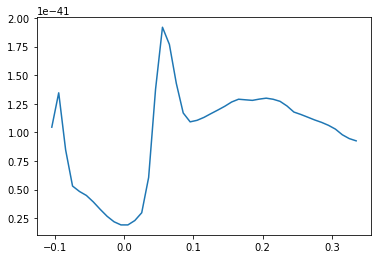

In [49]:
plt.plot(sn.time, luminosity['NuE'])